In [1]:
from Model import *

In [2]:
ds = DataSet()
X, y, classes, labels, idx, labels_r, X_train, y_train, X_test, y_test = ds.load_data()
print(labels)
print(labels_r)
print(idx)
print(len(X_train), len(X_test), len(y_train), len(y_test))

Loading Data


100%|██████████████████████████| 42000/42000 [00:01<00:00, 38777.20it/s]


Data Loaded
Creating Labels from the Classes


100%|███████████████████████████████| 10/10 [00:00<00:00, 263792.70it/s]


Created Labels from the Classes
Converting Data -> X,y + train,test
{1: 1, 7: 2, 3: 3, 9: 4, 2: 5, 6: 6, 0: 7, 4: 8, 8: 9, 5: 10}
{1: 1, 2: 7, 3: 3, 4: 9, 5: 2, 6: 6, 7: 0, 8: 4, 9: 8, 10: 5}
10
31500 10500 31500 10500


In [3]:
model = CNN(idx_of_classes=idx).to(DEVICE)
criterion = MSELoss()
optimizer = Adam(model.parameters(), lr=0.001)

In [4]:
hp = Help_Funcs()
(
    PROJECT_NAME,
    name,
    epochs,
    X_train,
    y_train,
    X_test,
    y_test,
    batch_size,
    device,
    model,
    criterion,
    optimizer,
) = hp.train(
    PROJECT_NAME,
    "BaseLine CNN",
    125,
    X_train.view(-1, 1, 28, 28).to(DEVICE),
    y_train.to(DEVICE),
    X_test.view(-1, 1, 28, 28),
    y_test.to(DEVICE),
    BATCH_SIZE,
    DEVICE,
    model,
    criterion,
    optimizer,
    labels_r,
)

wandb: Currently logged in as: ranuga-d (use `wandb login --relogin` to force relogin)
RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd


  0%|                                           | 0/125 [00:00<?, ?it/s]
12it [00:00, 14563.56it/s]

0it [00:00, ?it/s]
2996it [00:00, 29950.96it/s]
6037it [00:00, 30218.13it/s]
10500it [00:00, 30306.67it/s][A
  1%|▎                                  | 1/125 [00:03<08:07,  3.93s/it]
12it [00:00, 9816.98it/s]

0it [00:00, ?it/s]
2825it [00:00, 28246.79it/s]
5732it [00:00, 28726.59it/s]
10500it [00:00, 29400.13it/s][A
  2%|▌                                  | 2/125 [00:07<08:02,  3.93s/it]
12it [00:00, 11966.63it/s]

0it [00:00, ?it/s]
2941it [00:00, 29400.78it/s]
6016it [00:00, 30015.84it/s]
10500it [00:00, 30066.70it/s][A
  2%|▊                                  | 3/125 [00:11<07:55,  3.89s/it]
12it [00:00, 11776.24it/s]

0it [00:00, ?it/s]
3157it [00:00, 31559.87it/s]
6313it [00:00, 31141.87it/s]
10500it [00:00, 30379.17it/s][A
  3%|█                                  | 4/125 [00:15<07:57,  3.95s/it]
12it [00:00, 15187.58it/s]

0it [00:00, ?it/s]
2903it [00:00, 29022.97it/s]
5986it [00:0

Accuracy,▁▆▆▇▇▇██▇█▇▇▇█▇█▇▇█▇▇█▇▇▇▇▇████████▇█▇██
Accuracy Batch,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Loss,█▄▃▂▂▂▁▁▂▁▁▂▁▁▂▁▁▁▁▂▂▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▂▁▁
Loss Batch,▄▁▁▁▁▁█▁▁▁▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Accuracy,0.983
Accuracy Batch,1.0
Loss,0.00296
Loss Batch,3e-05


In [279]:
img = cv2.imread(f'./Model/tests/{os.listdir("./Model/tests/")[1]}')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(28,28))
img = img / 255.0

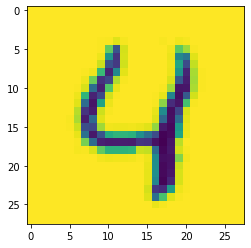

In [280]:
plt.imshow(img)

In [281]:
model.eval()
img = torch.tensor(img).view(-1,1,28,28).float().to('cuda')
with torch.no_grad():
    pred = model(img)

In [282]:
pred

tensor([[ 0.0087, -0.0234,  0.0871, -0.0294,  0.1133,  0.0337, -0.0442,  0.2094,
          0.0476,  0.0822]], device='cuda:0')

In [283]:
torch.argmax(pred[0])

tensor(7, device='cuda:0')